In [1]:
from pomegranate import *
import pandas as pd
import seaborn
seaborn.set_style('whitegrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('Iris.csv', sep=',',header=None)
df

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(df.index[0])

In [4]:
uniques_class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
index_to_classname = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}

In [5]:
feature_list = []
label_index_list = []
for index, row in df.iterrows():
    feature_list.append([float(i) for i in row[1:5].values])
    if row[5] == uniques_class_names[0]:
        label_index_list.append(0)
    if row[5] == uniques_class_names[1]:
        label_index_list.append(1)
    if row[5] == uniques_class_names[2]:
        label_index_list.append(2)
feature_list = np.array(feature_list, dtype=np.float32)

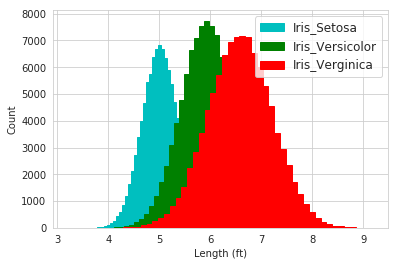

Setosa distribution has mu = 5.01 and sigma = 0.349
Versicolor distribution has mu = 5.94 and sigma = 0.511
Verginica distribution has mu = 6.59 and sigma = 0.629


In [6]:
f_0 = NormalDistribution.from_samples(feature_list[0:50][:,0])
f_1 = NormalDistribution.from_samples(feature_list[50:100][:,0])
f_2 = NormalDistribution.from_samples(feature_list[100:150][:,0])
f_0.plot( n=100000, edgecolor='c', color='c', bins=50, label='Iris_Setosa' )
f_1.plot( n=100000, edgecolor='g', color='g', bins=50, label='Iris_Versicolor' )
f_2.plot( n=100000, edgecolor='r', color='r', bins=50, label='Iris_Verginica' )
plt.legend( fontsize=12 )
plt.ylabel('Count')
plt.xlabel('Length (ft)')
plt.show()

print("Setosa distribution has mu = {:.3} and sigma = {:.3}".format( *f_0.parameters ))
print("Versicolor distribution has mu = {:.3} and sigma = {:.3}".format( *f_1.parameters ))
print("Verginica distribution has mu = {:.3} and sigma = {:.3}".format( *f_2.parameters ))

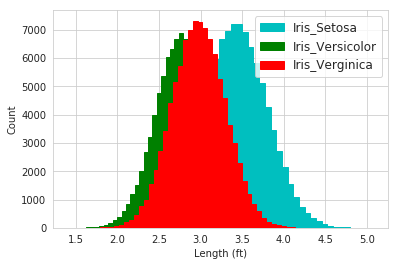

Setosa distribution has mu = 3.42 and sigma = 0.377
Versicolor distribution has mu = 2.77 and sigma = 0.311
Verginica distribution has mu = 2.97 and sigma = 0.319


In [7]:
f_0 = NormalDistribution.from_samples(feature_list[0:50][:,1])
f_1 = NormalDistribution.from_samples(feature_list[50:100][:,1])
f_2 = NormalDistribution.from_samples(feature_list[100:150][:,1])
f_0.plot( n=100000, edgecolor='c', color='c', bins=50, label='Iris_Setosa' )
f_1.plot( n=100000, edgecolor='g', color='g', bins=50, label='Iris_Versicolor' )
f_2.plot( n=100000, edgecolor='r', color='r', bins=50, label='Iris_Verginica' )
plt.legend( fontsize=12 )
plt.ylabel('Count')
plt.xlabel('Length (ft)')
plt.show()

print("Setosa distribution has mu = {:.3} and sigma = {:.3}".format( *f_0.parameters ))
print("Versicolor distribution has mu = {:.3} and sigma = {:.3}".format( *f_1.parameters ))
print("Verginica distribution has mu = {:.3} and sigma = {:.3}".format( *f_2.parameters ))

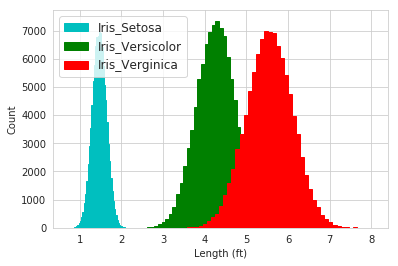

Setosa distribution has mu = 1.46 and sigma = 0.172
Versicolor distribution has mu = 4.26 and sigma = 0.465
Verginica distribution has mu = 5.55 and sigma = 0.546


In [8]:
f_0 = NormalDistribution.from_samples(feature_list[0:50][:,2])
f_1 = NormalDistribution.from_samples(feature_list[50:100][:,2])
f_2 = NormalDistribution.from_samples(feature_list[100:150][:,2])
f_0.plot( n=100000, edgecolor='c', color='c', bins=50, label='Iris_Setosa' )
f_1.plot( n=100000, edgecolor='g', color='g', bins=50, label='Iris_Versicolor' )
f_2.plot( n=100000, edgecolor='r', color='r', bins=50, label='Iris_Verginica' )
plt.legend( fontsize=12 )
plt.ylabel('Count')
plt.xlabel('Length (ft)')
plt.show()

print("Setosa distribution has mu = {:.3} and sigma = {:.3}".format( *f_0.parameters ))
print("Versicolor distribution has mu = {:.3} and sigma = {:.3}".format( *f_1.parameters ))
print("Verginica distribution has mu = {:.3} and sigma = {:.3}".format( *f_2.parameters ))

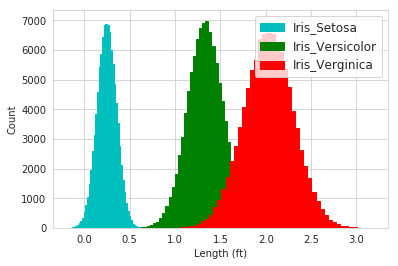

Setosa distribution has mu = 0.244 and sigma = 0.106
Versicolor distribution has mu = 1.33 and sigma = 0.196
Verginica distribution has mu = 2.03 and sigma = 0.272


In [9]:
f_0 = NormalDistribution.from_samples(feature_list[0:50][:,3])
f_1 = NormalDistribution.from_samples(feature_list[50:100][:,3])
f_2 = NormalDistribution.from_samples(feature_list[100:150][:,3])
f_0.plot( n=100000, edgecolor='c', color='c', bins=50, label='Iris_Setosa' )
f_1.plot( n=100000, edgecolor='g', color='g', bins=50, label='Iris_Versicolor' )
f_2.plot( n=100000, edgecolor='r', color='r', bins=50, label='Iris_Verginica' )
plt.legend( fontsize=12 )
plt.ylabel('Count')
plt.xlabel('Length (ft)')
plt.show()

print("Setosa distribution has mu = {:.3} and sigma = {:.3}".format( *f_0.parameters ))
print("Versicolor distribution has mu = {:.3} and sigma = {:.3}".format( *f_1.parameters ))
print("Verginica distribution has mu = {:.3} and sigma = {:.3}".format( *f_2.parameters ))

In [10]:
model = NaiveBayes.from_samples(NormalDistribution,feature_list, label_index_list)

In [11]:
data = np.array([[5.0, 1.0, 0.92, 1.5]])

In [12]:
model.predict_proba(data)

array([[2.57391880e-22, 9.99999947e-01, 5.30196363e-08]])

In [13]:
index_to_classname[model.predict(data)[0]]

'Iris-versicolor'